In [55]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('covid_df2.db')
df2 = pd.read_sql('SELECT * FROM table2',conn)



df2.head(5)



,index,State,positiveTestsViral,negativeTestsViral,positiveCasesViral
0,0,AK,7137629,190723351,0
1,1,AL,0,0,51721523
2,2,AR,0,310558428,32224431
3,3,AS,0,0,0
4,4,AZ,12089,0,90126706


In [56]:
conn = sqlite3.connect('covid_df3.db')
df3 = pd.read_sql('SELECT * FROM table3',conn)

df3.head(5)


,index,Total Cases,Total Deaths,Total Recovered,Tot Cases/ 1M pop,Deaths/ 1M,Total Tests,Tests/ 1M,State
0,1,12521222,105905,12368032,316895.0,2680,202799362,5132573,CA
1,2,8889284,95298,8772280,306571.0,3287,73904384,2548789,TX
2,3,7841223,91921,7742773,365086.0,4280,66800091,3110202,FL
3,4,7254311,78417,7158417,372904.0,4031,131503719,6759879,NY
4,5,4136659,42005,4094654,326446.0,3315,57898053,4569040,IL


In [57]:
conn = sqlite3.connect('covid_df1.db')
df1 = pd.read_sql('SELECT * FROM table1',conn)


df1.head(5)

,index,State,total_vaccinations,total_distributed,people_vaccinated
0,0,AK,396405330,540447125,194353901
1,1,AL,-2147483648,-2147483648,1219792045
2,2,AR,1569412128,-2147483648,808560581
3,3,AS,34888693,39456780,17036877
4,4,AZ,-2147483648,-2147483648,2119475753


In [58]:
from functools import reduce
data= reduce(lambda left,right:
                   pd.merge(left,right,
                           on=['State']),
                    [df1,df2,df3])


data.head()

,index_x,State,total_vaccinations,total_distributed,people_vaccinated,index_y,positiveTestsViral,negativeTestsViral,positiveCasesViral,index,Total Cases,Total Deaths,Total Recovered,Tot Cases/ 1M pop,Deaths/ 1M,Total Tests,Tests/ 1M
0,0,AK,396405330,540447125,194353901,0,7137629,190723351,0,46,301513,1485,298902,412159.0,2030,4790640,6548661
1,1,AL,-2147483648,-2147483648,1219792045,1,0,0,51721523,25,1659936,21138,1623935,338542.0,4311,9332317,1903317
2,2,AR,1569412128,-2147483648,808560581,2,0,310558428,32224431,30,1033650,13246,1018964,342517.0,4389,8036831,2663139
3,3,AS,34888693,39456780,17036877,3,0,0,0,56,8359,34,0,0.0,0,16964,0
4,4,AZ,-2147483648,-2147483648,2119475753,4,12089,0,90126706,13,2543916,33774,2492075,349501.0,4640,22489035,3089698


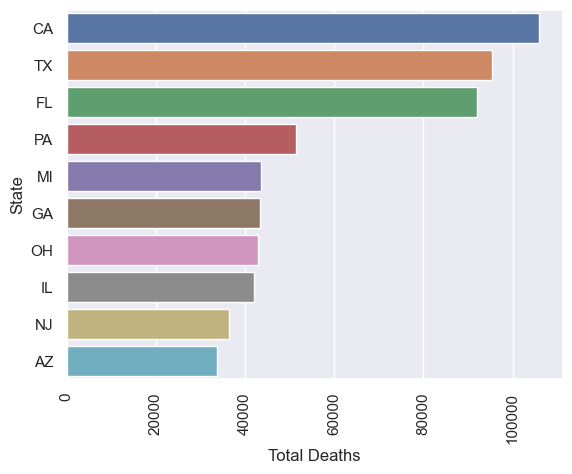

In [59]:
# Barchart showing top ten states with high death counts
import matplotlib.pyplot as plt
import seaborn as sns

top_ten = data.sort_values(by = 'Total Deaths', ascending=False).head(10)


#plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')


plot = sns.barplot(x = 'Total Deaths', y = 'State', data = top_ten)
plt.xticks(rotation=90)


plt.show()


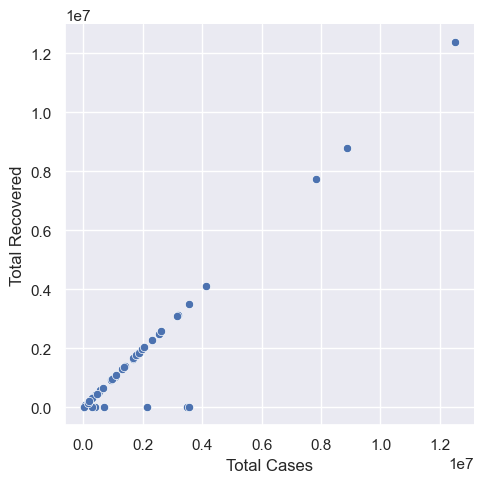

In [60]:
# relating the variables with scatterplots Total Cases Vs Total Recovered

sns.relplot(x = 'Total Cases', y ='Total Recovered',data = data )

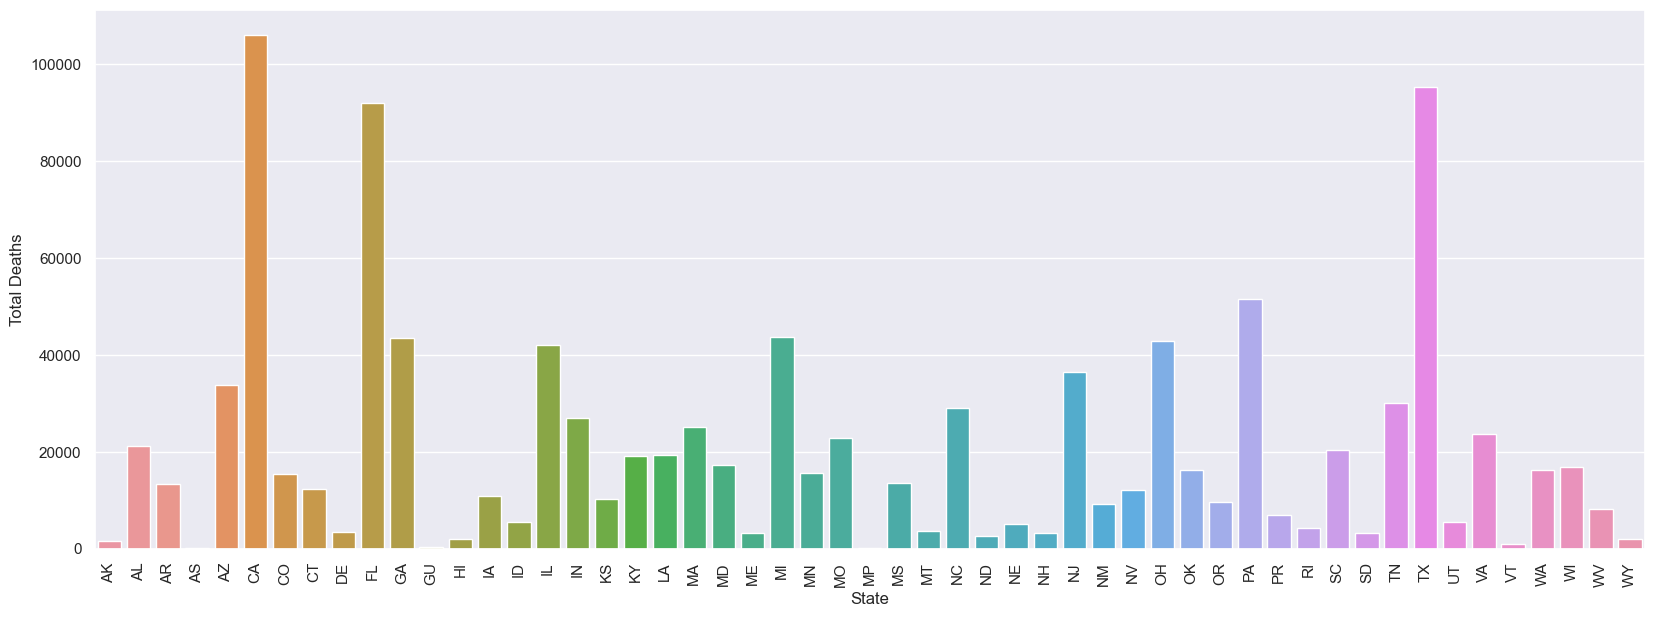

In [62]:
# Bar plot of all the states with Total deaths

plt.figure(figsize=(20,7))
sns.barplot(x='State',y ='Total Deaths', data = data)
plt.xticks(rotation=90)
plt.show()

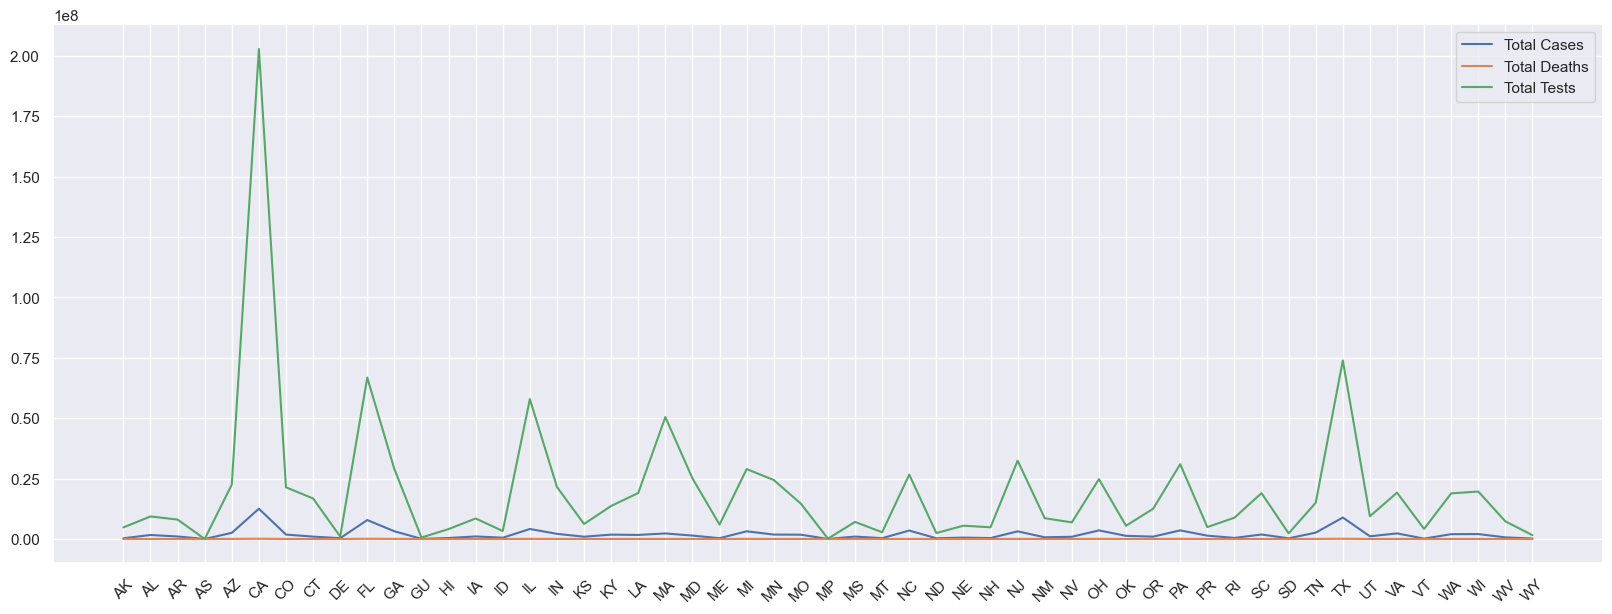

In [63]:


df = data.groupby('State')[['Total Cases','Total Deaths','Total Tests']].sum().reset_index()
plt.figure(figsize=(20,7))
#plotting  a line chart to compare total tests, deaths and cases accross the states.
plt.plot (df['State'],df['Total Cases'])
plt.plot(df['State'],df['Total Deaths'])
plt.plot(df['State'],df['Total Tests']) 
plt.xticks(rotation=45)
 

            
plt.legend(['Total Cases','Total Deaths','Total Tests'])


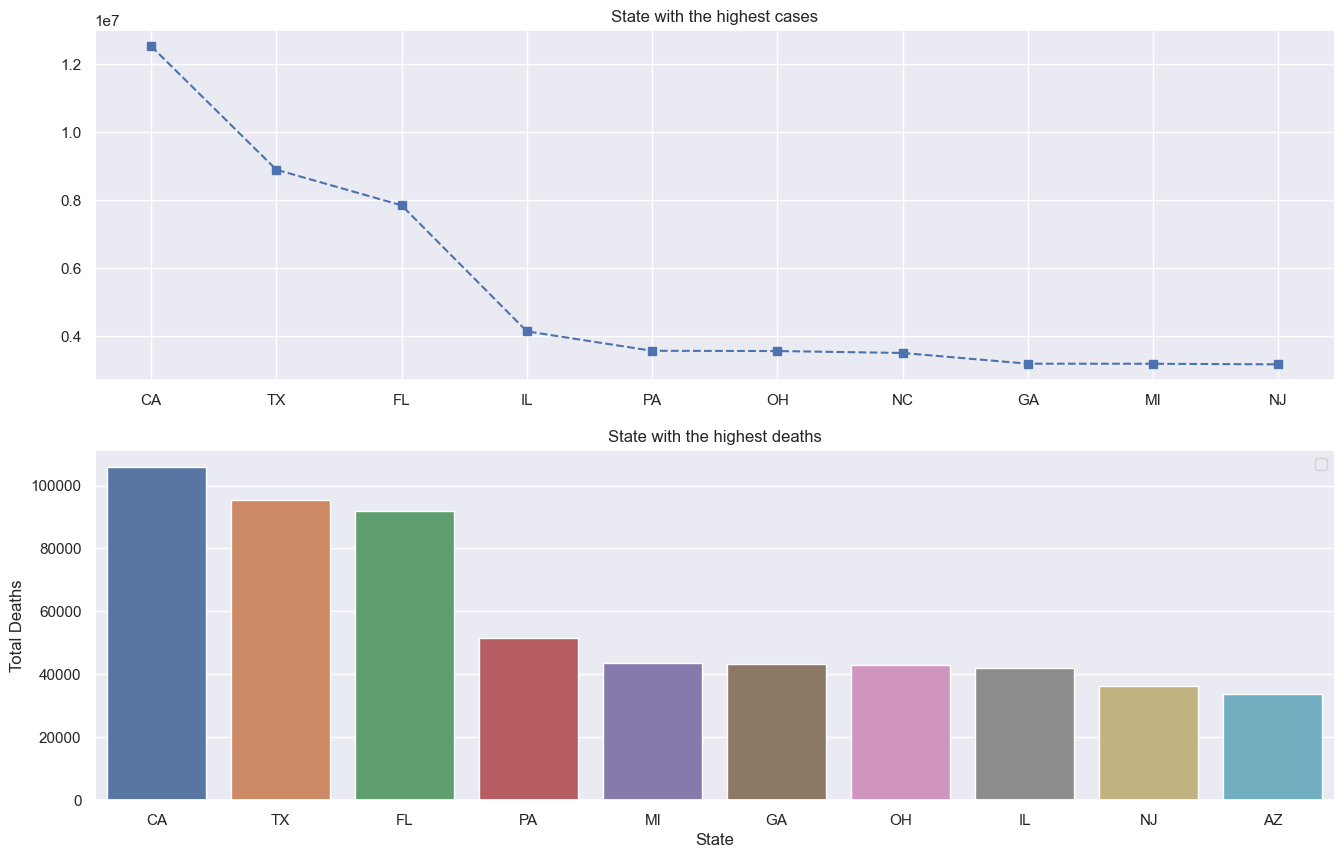

In [68]:
most_cases = data.sort_values(by='Total Cases', ascending = False).head(10)
top_ten = data.sort_values(by = 'Total Deaths', ascending=False).head(10)

fig, axes = plt.subplots(2,1,figsize =(16,10))
axes[0].plot(most_cases['State'],most_cases['Total Cases'],'s--b')
axes[0].set_title('State with the highest cases')
plt.legend(['State','Total cases'])


axes[1].set_title('State with the highest deaths')
sns.barplot(x = 'State', y ='Total Deaths', data = top_ten,ax =axes[1])

plot.tight_layout(pad=2)